In [8]:
if "lofi_radio" not in os.getcwd().split(os.sep)[-1].lower():
    os.chdir("..")

import miditok

import torch 
import numpy as np
import pandas as pd
import glob 
from tqdm import tqdm
import mido
import symusic
from util.play_midi import play_midi

import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt


os.getcwd()

'c:\\Users\\joeac\\Documents\\Uni\\Y3\\Project\\lofi_radio-1'

In [9]:
midi_files = list(Path("data/").glob("**/*.mid"))
print(len(midi_files))

tokenizers = {"REMI":miditok.REMI(), "MIDI_LIKE":miditok.MIDILike(), "Octuple": miditok.Octuple(), "CP_Word": miditok.CPWord()}

for item in tokenizers:
    print(f"{item} has vocab size of : {len(tokenizers[item])}")

940
REMI has vocab size of : 282
MIDI_LIKE has vocab size of : 398
Octuple has vocab size of : 357
CP_Word has vocab size of : 304


In [10]:
song2_file = midi_files[1]
song2_file

WindowsPath('data/jazz_midi/2ndMovementOfSinisterFootwear.mid')

[('REMI', 282 tokens with ('I', 'T') io format, without BPE), ('MIDI_LIKE', 398 tokens with ('I', 'T') io format, without BPE), ('Octuple', [153, 36, 68, 36, 396] tokens with ('I', 'T', 'C') io format(multi-voc), without BPE), ('CP_Word', [6, 38, 154, 37, 69] tokens with ('I', 'T', 'C') io format(multi-voc), without BPE)]


Text(0.5, 0, 'Tokenizer')

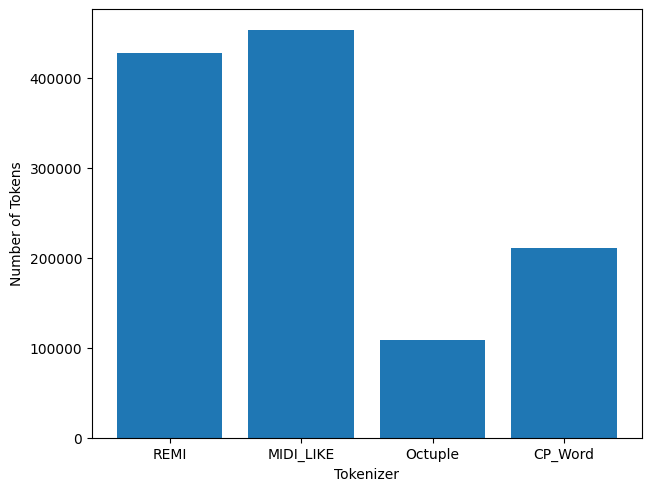

In [86]:
song1_file = midi_files[-2] # short, single tracked song
song2_file = midi_files[1] # long, multitrack song


def tokenizer_info(song_file, tokenizer):
    tracks = tokenizer(song_file)
    tokens_per_track = [len(track) for track in tracks]
    num_of_tokens = sum(tokens_per_track)
    # print(num_of_tokens, len(tracks))
    return tracks, num_of_tokens

tokens_per_tokenizer = [0]*len(tokenizers)
for file in midi_files[25:50]:
    for i,name in enumerate(tokenizers.keys()):
        tracks, num_of_tokens = tokenizer_info(file, tokenizers[name])
        tokens_per_tokenizer[i] += num_of_tokens




print([i for i in list(tokenizers.items())])

fig, ax = plt.subplots(layout = "constrained")
# ax.bar(tokenizers.keys(), [tokenizer_info(song2_file, tokenizers[name])[1] for name in tokenizers.keys()])
ax.bar(tokenizers.keys(), tokens_per_tokenizer)
ax.set_ylabel("Number of Tokens")
ax.set_xlabel("Tokenizer")

In [13]:
file = midi_files[-2]
print(file)

song = mido.MidiFile(file)

tokenized_songs = [i(file) for i in tokenizers.items()]

data\test\3.mid


TypeError: 'tuple' object is not callable

293